# Supplementary Information for:  
# Physiological mismatches between life-history traits shape the temperature dependence of arthropod fitness

<a class="tocSkip">

In [601]:
#Load some modules etc
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault) # Reset plots to default style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.grid'] = 'true'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['grid.alpha'] = .45
# plt.rcParams['axes.xmargin'] = 0
# plt.rcParams['axes.xmargin'] = 0
plt.rcParams['figure.figsize'] = [10/2.54, 8/2.54]

from sympy import *
import scipy as sc
import numpy as np
init_printing()
%matplotlib inline

## Model for arthropod maximum population growth rate (fitness)

In age-structured populations, the expected reproductive success of an individual can be described using the continuous form of the Euler-Lotka equation:
$$
	\int\limits_{\alpha}^\infty \mathrm{e}^{-r_m x}l_{x}b_{x}\, \mathrm{d}x = 1
$$
where $r_m$ is the maximal population growth rate, $a$ is the age of first reproduction, $l_x$ is the age-specific survivorship, and $b_x$ is the age-specific fecundity. Solving this equation gives $r_m$ as a function of life-history parameters (the life-history traits).

In [602]:
x, l_a, b_max, alpha, z, z_J, kappa, T, M_0, K, t = var('x l_a b_max alpha z z_J kappa T M_0 K t',real=True, positive = true) #assign symbolic variables

r_m  = var('r_m', real = True) # r_m can be negative

Because a Type III survivorship curve within life stages (which assumes a constant mortality rate) is a resonable approximation for arthropods ([Amarasekare and Savage, 2012](http://www.ncbi.nlm.nih.gov/pubmed/22218308)), given an instantaneous mortality rate, $z$, age-specific survivorship, $l_x$, declines exponentially with age and can be modeled as:

\begin{equation} 
	l_x = l_{\alpha}\mathrm{e}^{-z(x-\alpha)}
\end{equation}

Here, $l_\alpha$ is the proportion of eggs surviving to adulthood (age $\alpha$), which, assuming a fixed instantaneous mortality rate across all juvenile stage, $z_J$, can be modelled as:
\begin{equation}
	l_\alpha = \mathrm{e}^{-\int\limits_0^\alpha z_J\, \mathrm{d}x} = 
	\mathrm{e}^{-z_J \alpha}
\end{equation}

In [603]:
l_a = exp(-integrate(z_J,(x,0,alpha))); l_a

This, when substituted into the $l_x$ equation then gives

\begin{equation}
	l_x = \mathrm{e}^{-(z_J \alpha + z(x-\alpha))}
\end{equation}

<!-- This model can be easily adapted for a variable mortality rate, for example due to senescence, often modelled using a gompertz equation. -->

In [604]:
l_x = l_a * exp(-z*(x - alpha)); simplify(l_x)

(where $x \ge \alpha $).

Next, age-specific fecundity $b_x$ is expected to reach a peak, $b_{max}$, shortly after maturation and then decline gradually with age. We model this using an exponential function
$$
	b_{x} = b_{max} \mathrm{e}^{\kappa \left(\alpha - x\right)}
$$

where we assume that fecundity peaks at the age of first reproduction, which occurs immediately at the time of adult emergence ($\alpha$), and $\kappa$ is a shape parameter (the fecundity loss rate in day$^{-1}$) that controls the spread of the fecundity schedule, that is, the rate of decline in fecundity after its peak. It is also possible that there is a systematic temperature-dependence of the delay between $\alpha$ and the age of peak fecundity. This can be modelled using a shifted exponential or gompertz equation, but is outside the scope of the current study. The figures below show the shape of the $b_x$ model.

In [605]:
b_x = b_max * exp(-kappa*(x - alpha)); simplify(b_x)

We can now visualize these functions.

In [606]:
#assign parameter values

z_J_par = .05 #1/day
z_par = .03 #1/day
alp_par = 25. #days
b_max_par = 1. #individuals/(individual * day)
kap_par = .1 #1/day

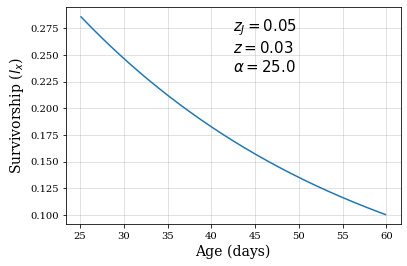

In [607]:
#Numerically evaluate
x_vec = np.arange(0, 60, 0.1) #vector of ages

l_x_lam = lambdify((z_J, z, alpha,x), l_x, np) # Use lambidfy to speed up
l_x_vec = l_x_lam(z_J_par, z_par, alp_par, x_vec[x_vec>alp_par])

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(x_vec[x_vec>alp_par], l_x_vec)
ax.set_xlabel('Age (days)', fontsize=14)
ax.set_ylabel('Survivorship ($l_x$)', fontsize=14)
ax.text(sc.mean(x_vec[x_vec>alp_par]), sc.amax(l_x_vec), 
        '$z_J = ' + str(z_J_par)+'$ \n' + 
        '$z = ' + str(z_par)+'$ \n' + 
        r'$\alpha = ' + str(alp_par)+'$ \n',
        horizontalalignment='left', verticalalignment='top', fontsize=15)

plt.savefig('../results/lxModel.pdf')

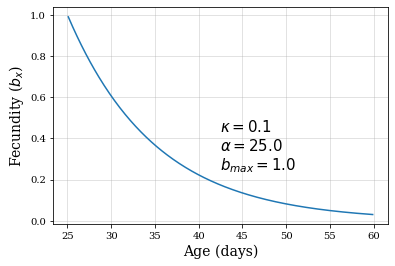

In [608]:
fig = plt.figure(); ax = fig.add_subplot(111)
b_x_lam = lambdify((b_max, kappa, alpha, x), b_x, np) #use lambidy to speed up
b_x_vec = b_x_lam(b_max_par, kap_par, alp_par, x_vec[x_vec>alp_par])

ax.plot(x_vec[x_vec>alp_par], b_x_vec);
ax.set_xlabel('Age (days)', fontsize=14); 
ax.set_ylabel('Fecundity ($b_x$)', fontsize=14)
ax.text(sc.mean(x_vec[x_vec>alp_par]), sc.amax(b_x_vec)/2, 
        r'$\kappa = ' + str(kap_par)+'$ \n'+ 
        r'$\alpha = ' + str(alp_par)+'$ \n' +
        r'$b_{max} = ' + str(b_max_par)+'$ \n',
        horizontalalignment='left', verticalalignment='top', fontsize=15)

plt.savefig('../results/bxModel.pdf')

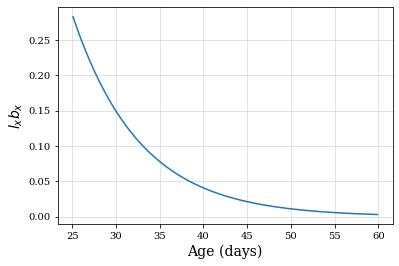

In [609]:
fig = plt.figure(); ax = fig.add_subplot(111) #now plot lxmx

ax.plot(x_vec[x_vec>alp_par], b_x_vec*l_x_vec);
ax.set_xlabel('Age (days)', fontsize=14); 
ax.set_ylabel('$l_x b_x$', fontsize=14)

plt.savefig('../results/lxbxModel.pdf')

Next, substituting the $l_x$ and $b_x$ models into the Euler-Lotka Equation, we get

$$	
\int\limits_{\alpha}^\infty b_{max} \mathrm{e}^{- \alpha z_{J} + \kappa \left(\alpha - x\right) - r x + z \left(\alpha - x\right)}\, \mathrm{d}x = 1
$$

i.e., 
$$
b_{max}\mathrm{e}^{- \alpha z_J} 
\int\limits_{\alpha}^\infty \mathrm{e}^{- r x + (\kappa + z) (\alpha - x)}\, \mathrm{d}x = 1
$$

In [610]:
EuLo = exp(-r_m * x) * l_x * b_x; simplify(EuLo)

And evaluating the integral produces after simplification:

\begin{equation}
    \frac{b_{max} e^{- \alpha \left(r + z_{J}\right)}}{\kappa + r + z} = 1
\end{equation}

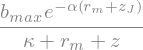

In [611]:
# Integrate EuLo (sagemath used to integrate(EuLo, x, alpha, infinity), with positivity constraints on all parameters), which gives:
EuLo_int = b_max*exp(-alpha*z_J)/((kappa + r_m)*exp(alpha*r_m) + z*exp(alpha*r_m)); simplify(EuLo_int)

Solving this for $r_m$ gives:

\begin{equation}
r_m = \frac{1}{\alpha} \left(- \alpha (\kappa + z) + \operatorname{LambertW}{\left(\alpha b_{max} e^{\alpha \left(\kappa + z - z_{J}\right)} \right)}\right)
\end{equation}

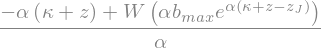

In [612]:
r_SP = solve(EuLo_int-1,r_m); r_SP = simplify(r_SP[0]); r_SP

The LambertW function part is difficult to use for parameter sensitivity analyses (and also hard to interpret). An approximation for its main (real) branch can be found, but it involves a double logarithm, which still results in divergence of certain analyses (below). Therefore instead, we directly derive an approximation to the solution of the integral above, as follows. 

First, we take a log of both sides of the equation:

\begin{equation}
    \log(b_{max}) - \alpha (r + z_J) - \log(\kappa + r + z) = 0
\end{equation}

As such, this equation still cannot be solved for $r_m$ because of the term $\mathrm{ln}(\kappa + r + z)$. But we can approximate just this term by performing a power series expansion of it around $r_m = 0$:

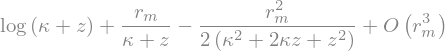

In [613]:
series(ln(r_m + kappa + z),r_m, 0,3)

That is, 

$$
 \frac{b_{max} e^{- \alpha z_{J}}}{z e^{\alpha r_{m}} + \left(\kappa + r_{m}\right) e^{\alpha r_{m}}}
 \approx \log{\left (\kappa + z \right )} + \frac{r_{m}}{\kappa + z} - \frac{r_{m}^{2}}{2 \kappa^{2} + 4 \kappa z + 2 z^{2}} + \mathcal{O}\left(r_{m}^{3}\right)
$$

Then, substituting the first two terms back into the integral solution and solving for $r_m$ gives:

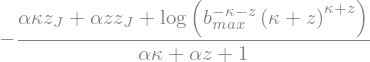

In [614]:
EuLo_int_app = b_max*exp(-alpha*(r_m + z_J))/ exp(log(kappa + z) + r_m/(kappa + z))

r_SP_app = solve(EuLo_int_app-1, r_m); r_SP_app = simplify(r_SP_app[0]); r_SP_app

Thus the approximation is: 

$$
	r_m \approx \frac{-\alpha \kappa z_J - \alpha z z_J + \kappa \log{\left (\frac{b_{max}}{\kappa + z} \right )} + z \log{\left (\frac{b_{max}}{\kappa + z} \right )}}{\alpha (\kappa + z) + 1}  
$$

that is, 

$$r_m \approx \frac{(\kappa + z)  \left( \log\left(\frac{b_{max}}{\kappa + z} \right) - \alpha z_J\right)}{\alpha (\kappa + z) + 1} $$

The figures below show that this approximation is very good as long as $r_m$ is relatively small (approx. $<0.5$). This range of $r_m$ values is typically where maximal growth rates of arthropods typically lie ([Frazier et al 2006](https://www.journals.uchicago.edu/doi/full/10.1086/506977)).

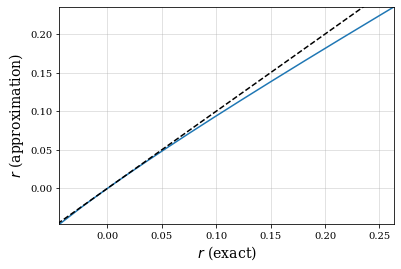

In [615]:
from scipy.special import lambertw

bmax_vec = np.arange(.1, 1000, 0.1).astype(float) #vector of b_max's

#use lambidy to speed up:
r_SP_app_lam = lambdify((b_max, z_J, z, kappa, alpha), r_SP_app, np)
r_SP_app_vec = r_SP_app_lam(bmax_vec, z_J_par, z_par, kap_par, alp_par)

# Specify r_SP with lambertw:
tmp = lambertw((alp_par*bmax_vec*exp(alp_par*(kap_par + z_par - z_J_par))).astype('float')).real
r_SP_vec = -(kap_par + z_par) + tmp/alp_par

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(r_SP_vec, r_SP_app_vec)
ax.plot(np.arange(-1,5,0.1), np.arange(-1,5,0.1), "k--")
ax.set_xlim([min(r_SP_vec),max(r_SP_vec)])
ax.set_ylim([min(r_SP_app_vec),max(r_SP_app_vec)])
ax.set_xlabel('$r$ (exact)', fontsize=14); 
ax.set_ylabel('$r$ (approximation)', fontsize=14)

plt.savefig('../results/rapprox0.pdf')

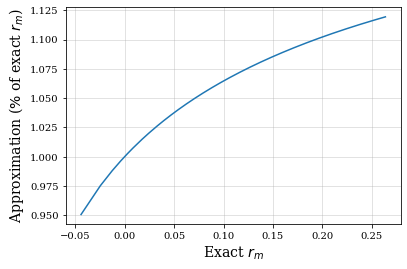

In [616]:
fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(r_SP_vec, r_SP_vec/r_SP_app_vec)
ax.set_xlabel('Exact $r_m$', fontsize=14) 
ax.set_ylabel(r'Approximation ($\%$ of exact $r_m$)', fontsize=14)

plt.savefig('../results/rapprox1.pdf')

The parameters underlying ($r_m$) fitness and their units are summarized in the following table:

| **Parameter**| **Units** | **Description** |
|-------------|-----------|-----------------|
| $a$ | day | Age of maturation (egg to adult development time)|
|$b_{max}$ | individuals (eggs) $\times$ individual (female) $\times$ day $^{-1}$ , i.e., day$^{-1}$ | Maximum fecundity (reproductive rate)|
|$z$ | day$^{-1}$ | Adult mortality rate |
|$z_J$ | day$^{-1}$ | Mortality rate across all juvenile stages |
|$\kappa$ | day$^{-1}$ | Fecundity loss rate|


## Temperature-dependence of life history parameters 

We describe the thermal performance curve for each life history parameter using the Sharpe-Schoolfield model, or its inverse: 

In [617]:
B_0, E, E_D, T_pk, k, T, T_ref = var('B_0 E E_D T_pk k T T_ref') # Assign symbolic variables

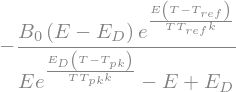

In [618]:
B = B_0 * exp(-E * ((1/(k*(T))) - (1/(k*T_ref)))) /(1 + (E / (E_D - E)) * exp((E_D / k)* ((1/T_pk) - (1/T)))); simplify(B)

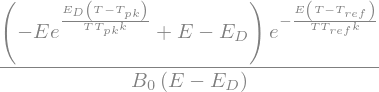

In [619]:
B_inv = simplify(1/B); B_inv

The Sharpe-Schoolfield model provides a mechanistic, thermodynamic basis for the thermal performance curves of biological traits/rates, including the hotter is better pattern. To illustrate it, we will use some arbitrary, but feasible values for its parameters (Dell et al 2011):

In [620]:
k_par = 8.617 * 10**-5
E_par = .6
E_D_par = 4
T_pk_par = 25
T_ref_par = 10+273.15
B_0_par = 1

### Thermal Performance Curve (TPC) parameterizations of life history traits

In order to evaluate the model, we use idealised thermal performance curves (TPCs) parametrised to have equal sensitivity to temperature by assigning all traits the same values for thermal optimum ($T_{pk}$), activation energy ($E$) and deactivation energy ($E_D$), consistent with the median values found in our empirical data (see main text). These are also consistent with the results of Dell *et al.* (2011). The parameter values for $B_0$ were also chosen to be consistent with our empirical data (see main text). In the absence of appropriate data on the rate of loss of fertility ($\kappa$), we evaluate the model for a range of values (below).

|**Model parameter** | **Normalization constant ($B_0$)** | **Thermal optimum ($T_{pk}$)** | **Thermal Sensitivity ($E$)** | **Decativation energy ($E_D$)** |
|----------------------|----------------------|----------------------|----------------------|-----------------|
|$\alpha$ | 25 | 25 | 0.6 | 4 |
|$b_{max}$ | 1 | 25 | 0.6 | 4 |
|$z$ | 0.03 | 25 | 0.6 | 4 |
|$z_J$ | 0.05 | 25 | 0.6 | 4 |
|$\kappa$ | 0-1 | 25 | 0.6 | 4 |

In [621]:
T_vec = 273.15+np.arange(0, 40, 0.05) #Vector of temperatures

#Generate some illustrative curves:

B_lam = lambdify((B_0, E, T_pk, T_ref, E_D,k,T), B, np) 
B_vec0 = B_lam(B_0_par,E_par,T_pk_par-5+273.15,T_ref_par,E_D_par,k_par,T_vec)
B_vec1 = B_lam(B_0_par,E_par,T_pk_par+273.15,T_ref_par,E_D_par,k_par,T_vec)
B_vec2 = B_lam(B_0_par,E_par,T_pk_par+5+273.15,T_ref_par,E_D_par,k_par,T_vec)

B_inv_lam = lambdify((B_0, E, T_pk, T_ref, E_D,k,T), B_inv, np)
B_inv_vec0 = B_inv_lam(1/B_0_par,E_par,T_pk_par-5+273.15,T_ref_par,E_D_par,k_par,T_vec) #inverse because we are using inverse of the S-S TPC model
B_inv_vec1 = B_inv_lam(1/B_0_par,E_par,T_pk_par+273.15,T_ref_par,E_D_par,k_par,T_vec)
B_inv_vec2 = B_inv_lam(1/B_0_par,E_par,T_pk_par+5+273.15,T_ref_par,E_D_par,k_par,T_vec)

#Assign trait-specific TPC values:

B_0_alp =  1/alp_par#days; inverse because we are using inverse of the Sharpe-Schoolfield model
T_pk_alp = T_pk_par
E_alp = E_par
E_D_alp = E_D_par

B_0_bmax = b_max_par #individuals/(individual * day)
T_pk_bmax = T_pk_par
E_bmax = E_par
E_D_bmax = E_D_par

B_0_z = 1/z_par  #1/day; inverse because we are using inverse of the S-S TPC model
T_pk_z = T_pk_par
E_z = E_par
E_D_z = E_D_par

B_0_zJ = 1/z_J_par  #1/day; inverse because we are using inverse of the S-S TPC model
T_pk_zJ = T_pk_par
E_zJ = E_par
E_D_zJ = E_D_par

B_0_kap = kap_par #1/day
T_pk_kap = T_pk_par
E_kap = E_par
E_D_kap = E_D_par

#Calculate the trait TPCs for 3 temperatures

alp_vec0 = B_inv_lam(B_0_alp,E_alp,T_pk_alp-5+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec0 = B_lam(B_0_bmax,E_bmax,T_pk_bmax-5+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec0 = B_inv_lam(B_0_z,E_z,T_pk_z-5+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec0 = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ-5+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec0 = B_lam(B_0_kap,E_kap,T_pk_kap-5+273.15,T_ref_par,E_D_kap,k_par,T_vec)

alp_vec1 = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec1 = B_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec1 = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec1 = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec1 = B_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

alp_vec2 = B_inv_lam(B_0_alp,E_alp,T_pk_alp+5+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec2 = B_lam(B_0_bmax,E_bmax,T_pk_bmax+5+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec2 = B_inv_lam(B_0_z,E_z,T_pk_z+5+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec2 = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+5+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec2 = B_lam(B_0_kap,E_kap,T_pk_kap+5+273.15,T_ref_par,E_D_kap,k_par,T_vec)

## Temperature Dependence of $r_m$

To determine the temperature dependence of maximum population growth rate, we can substitute the thermal performance curves of the life history traits into the equation for $r_m$ derived above.

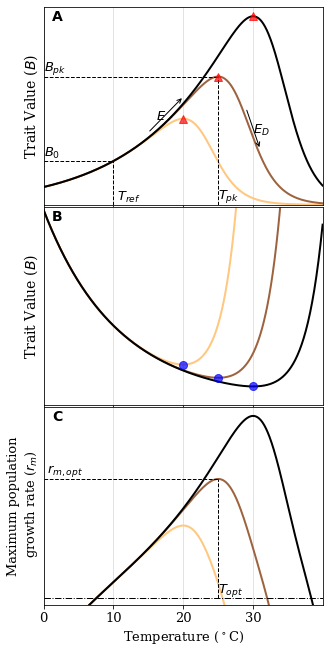

In [622]:
#Calculate r_m

r_m_vec0 = r_SP_app_lam(bmax_vec0, zJ_vec0, z_vec0, kap_vec0, alp_vec0)
r_m_vec1 = r_SP_app_lam(bmax_vec1, zJ_vec1, z_vec1, kap_vec1, alp_vec1)
r_m_vec2 = r_SP_app_lam(bmax_vec2, zJ_vec2, z_vec2, kap_vec2, alp_vec2)

######## Plot illustrative SS TPCs####### 
fig = plt.figure(figsize=(5, 11)); ax = fig.add_subplot(311)

cm = plt.cm.copper_r(np.linspace(0, 1, 3))
ax.set_prop_cycle('color',cm)
csfont = {'fontname':'DejaVu Sans'}

ax.plot(T_vec-273.15, B_vec0, linewidth=2) 
ax.plot(T_vec-273.15, B_vec1, linewidth=2) 
ax.plot(T_vec-273.15, B_vec2, linewidth=2)

E_arrow_ran = [15,20]; E_arrow_disp = 1.08
ax.annotate(s='', xy=(E_arrow_ran[0],B_vec1[sc.where(T_vec-273.15 == E_arrow_ran[0])[0][0]]*E_arrow_disp), 
            xytext=(E_arrow_ran[1],B_vec1[sc.where(T_vec-273.15 == E_arrow_ran[1])[0][0]]*E_arrow_disp), 
            arrowprops=dict(arrowstyle='<-'), horizontalalignment='left',verticalalignment='top')
ax.text(np.mean(E_arrow_ran),B_vec1[sc.where(T_vec-273.15 == np.mean(E_arrow_ran))[0][0]]*E_arrow_disp+.15, '$E$', 
        horizontalalignment='right', verticalalignment='top', fontsize=13)

E_D_arrow_ran = [29,31];E_D_arrow_disp = 1.12
ax.annotate(s='', xy=(E_D_arrow_ran[0],B_vec1[sc.where(T_vec-273.15 == E_D_arrow_ran[0])[0][0]]*E_D_arrow_disp), 
            xytext=(E_D_arrow_ran[1],B_vec1[sc.where(T_vec-273.15 == E_D_arrow_ran[1])[0][0]]*E_D_arrow_disp), 
            arrowprops=dict(arrowstyle='<-'), horizontalalignment='left',verticalalignment='top')
ax.text(np.mean(E_D_arrow_ran),B_vec1[sc.where(T_vec-273.15 == np.mean(E_D_arrow_ran))[0][0]]*E_D_arrow_disp+.15, '$E_D$', 
        horizontalalignment='left', verticalalignment='top', fontsize=13)

ax.plot([T_pk_par, T_pk_par], [0,max(B_vec1)], color='k', linestyle='--', linewidth=1)
ax.text(T_pk_par, 0, '$T_{pk}$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.plot([0,T_pk_par], [max(B_vec1), max(B_vec1)], color='k', linestyle='--', linewidth=1)
ax.text(0, max(B_vec1), '$B_{pk}$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.plot([0,10], [B_0_par, B_0_par], color='k', linestyle='--', linewidth=1)
ax.plot([10, 10], [0, B_0_par], color='k', linestyle='--', linewidth=1)
ax.text(0, B_0_par, '$B_0$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)
ax.text(10, 0, ' $T_{ref}$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.plot(T_pk_par-5, max(B_vec0), marker='^', markersize=8, color="red",alpha = 0.7)
ax.plot(T_pk_par, max(B_vec1), marker='^', markersize=8, color="red",alpha = 0.7)
ax.plot(T_pk_par+5, max(B_vec2), marker='^', markersize=8, color="red",alpha = 0.7)

ax.set_title('A', weight="bold", fontsize=14, x=.05, y=.9,**csfont); 
# ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('Trait Value ($B$)', fontsize=14)
ax.tick_params(axis='x', labelsize=13);
ax.axes.get_yaxis().set_ticks([]) # because values are arbitrary 
ax.set_xlim(0,max(T_vec)-273.15); 
ax.set_ylim(0,)
ax.axes.xaxis.set_ticklabels([])

######## Plot illustrative inverse SS TPCs####### 

ax = fig.add_subplot(312)
ax.set_prop_cycle('color',cm)
ax.plot(T_vec-273.15, B_inv_vec0, linewidth=2)
ax.plot(T_vec-273.15, B_inv_vec1, linewidth=2)
ax.plot(T_vec-273.15, B_inv_vec2, linewidth=2)

ax.plot(T_pk_par-5, min(B_inv_vec0), marker='o', markersize=8, color="blue",alpha = 0.7)
ax.plot(T_pk_par, min(B_inv_vec1), marker='o', markersize=8, color="blue",alpha = 0.7)
ax.plot(T_pk_par+5, min(B_inv_vec2), marker='o', markersize=8, color="blue",alpha = 0.7)

ax.set_title('B', weight="bold", fontsize=14, x=.05, y=.9,**csfont); 
# ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14);
ax.tick_params(axis='x', labelsize=13);
ax.set_ylabel('Trait Value ($B$)', fontsize=14)
ax.axes.get_yaxis().set_ticks([]) # because values are arbitrary 
ax.set_xlim(0,max(T_vec)-273.15); 
ax.set_ylim(0,2.5);
ax.axes.get_yaxis().set_ticks([])
ax.axes.xaxis.set_ticklabels([])

######## Plot r_m TPCs####### 

ax = fig.add_subplot(313)
ax.set_prop_cycle('color',cm)

ax.plot(T_vec-273.15, r_m_vec0, linewidth=2) 
ax.plot(T_vec-273.15, r_m_vec1, linewidth=2) 
ax.plot(T_vec-273.15, r_m_vec2, linewidth=2)

ax.plot([T_pk_par, T_pk_par], [0,max(r_m_vec1)], color='k', linestyle='--', linewidth=1)
ax.text(T_pk_par, 0, '$T_{opt}$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.plot([0,T_pk_par], [max(r_m_vec1), max(r_m_vec1)], color='k', linestyle='--', linewidth=1)
ax.text(0+.5, max(r_m_vec1), '$r_{m,opt}$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.set_title('C', weight="bold", fontsize=14, x=.05, y=.9,**csfont); 
ax.set_xlim(0,max(T_vec)-273.15);
ax.set_ylim(-.01,max(r_m_vec2)*(1+0.05));
ax.plot(T_vec-273.15, [0]*len(T_vec), color='k', linestyle='-.', linewidth=1);
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=13); 
ax.set_ylabel('Maximum population\n growth rate ($r_m$)', fontsize=13)
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);
ax.axes.get_yaxis().set_ticks([])

plt.subplots_adjust(hspace=.01)

plt.savefig('../results/r_TPC.pdf')

## Temperature-dependent trait sensitivity analysis

In order to determine the traits driving the the TPC for population growth rate to quantify the selection gradients and thermal mismatches, we assess the sensitivity of the model to the TPC of each trait.

This can be determined by using the chain rule to determine the relative contribution of the temperature dependence of each parameter (trait) to the temperature dependence of population growth rate. The relative contribution of a parameter can be expressed as the product of the partial derivative of population growth rate ($r_m$) with respect to a parameter and the derivative of that parameter with respect to temperature:

\begin{equation}
\frac{\mathrm{d}r_m}{\mathrm{d}T} = 
\frac{\partial r_m}{\partial b_{max}} \frac{\mathrm{d}b_{max}}{\mathrm{d}T} + 
\frac{\partial r_m}{\partial \alpha}\frac{\mathrm{d}\alpha}{\mathrm{d}T} + 
\frac{\partial r_m}{\partial z} \frac{\mathrm{d}z}{\mathrm{d}T} +
\frac{\partial r_m}{\partial z_J} \frac{\mathrm{d}z_J}{\mathrm{d}T} + 
\frac{\partial r_m}{\partial \kappa} \frac{\mathrm{d}\kappa}{\mathrm{d}T} 
\end{equation}

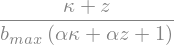

In [623]:
dr_dbmax = diff(r_SP_app, b_max); simplify(dr_dbmax)

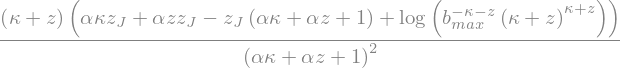

In [624]:
dr_dalp = diff(r_SP_app, alpha); simplify(dr_dalp)

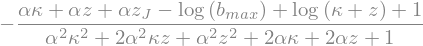

In [625]:
dr_dz = diff(r_SP_app, z); simplify(dr_dz)

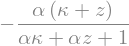

In [626]:
dr_dzJ = diff(r_SP_app, z_J); simplify(dr_dzJ)

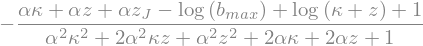

In [627]:
dr_dkap = diff(r_SP_app, kappa); simplify(dr_dkap)

For the TPC model, we ony need to calculate the derivative wrt $T$ for either the function $B$ (for parameters that are rates) or the 1/$B$ (for parameters that are times):

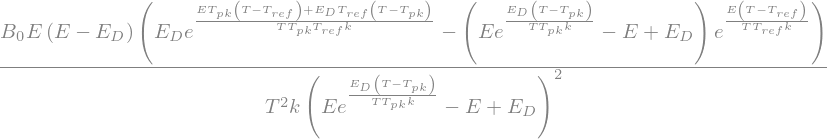

In [628]:
dBdT =  diff(B, T); simplify(dBdT)

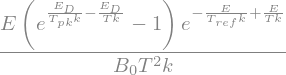

In [629]:
dB_invdT =  diff(B_inv, T); simplify(dB_invdT)

In [630]:
alp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec = B_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec = B_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

r_m_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec, alp_vec)

#Get the lambdified pd functions

dr_dalp_lam = lambdify((b_max, alpha, z, z_J, kappa), dr_dalp, np)
dr_dbmax_lam = lambdify((b_max, alpha, z, kappa), dr_dbmax, np)
dr_dz_lam = lambdify((b_max, alpha, z, z_J, kappa), dr_dz, np)
dr_dzJ_lam = lambdify((alpha, z, kappa), dr_dzJ, np)
dr_dkap_lam = lambdify((b_max, alpha, z, z_J, kappa), dr_dkap, np)

dalp_dT_lam = lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dB_invdT, np)
dbmax_dT_lam = lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dBdT, np)
dz_dT_lam =  lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dB_invdT, np)   
dzJ_dT_lam =  lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dB_invdT, np)
dkap_dT_lam =  lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dBdT, np)

# Numerically evaluate

dr_dalp_vec = dr_dalp_lam(bmax_vec, alp_vec, z_vec, zJ_vec, kap_vec)
dr_dbmax_vec = dr_dbmax_lam(bmax_vec, alp_vec, z_vec, kap_vec)
dr_dz_vec = dr_dz_lam(bmax_vec, alp_vec, z_vec, zJ_vec, kap_vec)
dr_dzJ_vec =  dr_dzJ_lam(alp_vec, z_vec, kap_vec)
dr_dkap_vec = dr_dkap_lam(bmax_vec, alp_vec, z_vec, zJ_vec, kap_vec)

dalp_dT_vec = dalp_dT_lam (B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
dbmax_dT_vec = dbmax_dT_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
dz_dT_vec =  dz_dT_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)  
dzJ_dT_vec =  dzJ_dT_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
dkap_dT_vec =  dkap_dT_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

# Calculate the parameter sensitivities
 
dr_dalp_dT_vec = dr_dalp_vec * dalp_dT_vec
dr_dbmax_dT_vec = dr_dbmax_vec * dbmax_dT_vec
dr_dz_dT_vec = dr_dz_vec * dz_dT_vec
dr_dzJ_dT_vec = dr_dzJ_vec * dzJ_dT_vec
dr_dkap_dT_vec = dr_dkap_vec * dkap_dT_vec

dr_dT_vec = dr_dbmax_dT_vec + dr_dalp_dT_vec + dr_dz_dT_vec + dr_dzJ_dT_vec + dr_dkap_dT_vec

r_alp_cons_vec = r_SP_app_lam(bmax_vec,zJ_vec, z_vec, kap_vec, alp_par)
r_bmax_cons_vec = r_SP_app_lam(b_max_par,zJ_vec, z_vec, kap_vec, alp_vec)
r_z_cons_vec = r_SP_app_lam(bmax_vec,zJ_vec, z_par, kap_vec, alp_vec)
r_zJ_cons_vec = r_SP_app_lam(bmax_vec,z_J_par, z_vec, kap_vec, alp_vec)
r_kap_cons_vec = r_SP_app_lam(bmax_vec,zJ_vec, z_vec, kap_par, alp_vec)

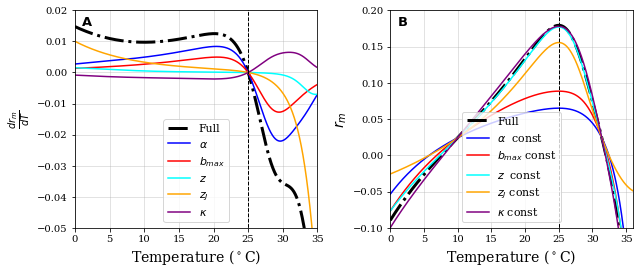

In [631]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.set_title('A', weight="bold", fontsize=13, x=.05, y=.9,**csfont); 

ax.plot(T_vec-273.15,dr_dT_vec, 'black',linewidth=3, linestyle='-.')
ax.plot(T_vec-273.15,dr_dalp_dT_vec, 'blue')
ax.plot(T_vec-273.15,dr_dbmax_dT_vec, 'red')
ax.plot(T_vec-273.15,dr_dz_dT_vec, 'cyan')
ax.plot(T_vec-273.15,dr_dzJ_dT_vec, 'orange')
ax.plot(T_vec-273.15,dr_dkap_dT_vec, 'purple')
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,35])
ax.set_ylim(-0.05,0.02)
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel(r'$\frac{dr_m}{dT}$', fontsize=14);
plt.legend(['Full', r'$\alpha$', '$b_{max}$', '$z$', '$z_J$', r'$\kappa$'], loc='lower center',fontsize=11) 

ax = fig.add_subplot(122)
ax.set_title('B', weight="bold", fontsize=13, x=.05, y=.9,**csfont); 
ax.plot(T_vec-273.15,r_m_vec, 'black',linewidth=3, linestyle='-.');
ax.plot(T_vec-273.15,r_alp_cons_vec, 'blue');
ax.plot(T_vec-273.15,r_bmax_cons_vec, 'red');
ax.plot(T_vec-273.15,r_z_cons_vec, 'cyan');
ax.plot(T_vec-273.15,r_zJ_cons_vec, 'orange');
ax.plot(T_vec-273.15,r_kap_cons_vec, 'purple');
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim(0,36)
ax.set_ylim(-0.1,.2)
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('$r_m$', fontsize=14);
plt.legend(['Full', r'$\alpha$  const', '$b_{max}$ const', '$z$  const', '$z_J$ const',r'$\kappa$ const'], loc='lower center',fontsize=11) 

plt.subplots_adjust(wspace=0.3)


plt.savefig('../results/r_sens.pdf')

**A**: The relative contribution of each parameter's TPC to the temperature sensitivity of $r_m$ (i.e., $\frac{dr_m}{dT}$ - "Full") (the black dash-dotted line). Greater the deviation of a parameter's partial derivative line from zero, greater its contribution (and therefore sensitivity of $\frac{dr_m}{dT}$ to it).

**B**: The sensitivity of the thermal response of $r_m$ to underlying trait TPCs assessed by holding each parameter's temperature denendence constant in turn. Greater deviation from the (black dash-dotted) "full" model line indicates greater contribution of that parameter's TPC.

## Calculating the thermal selection gradients

In order to assess the impact of changes in the $T_{pk}$s of different traits and lifestages on population fitness, we re-calculate the temperature-dependence of $r_m$ (its TPC) with respect to changes in each of them, holding all others constant. We do not include $\kappa$ as a focal trait for this because it has the weakest influence on $r_m$ (previous section), and also because there are almost no data on its temperature dependence.

<lambdifygenerated-163>:2: RuntimeWarning: overflow encountered in power
  return (-(alpha*kappa*z_J + alpha*z*z_J + log(b_max**(-kappa - z)*(kappa + z)**(kappa + z)))/(alpha*kappa + alpha*z + 1))
<lambdifygenerated-163>:2: RuntimeWarning: overflow encountered in multiply
  return (-(alpha*kappa*z_J + alpha*z*z_J + log(b_max**(-kappa - z)*(kappa + z)**(kappa + z)))/(alpha*kappa + alpha*z + 1))


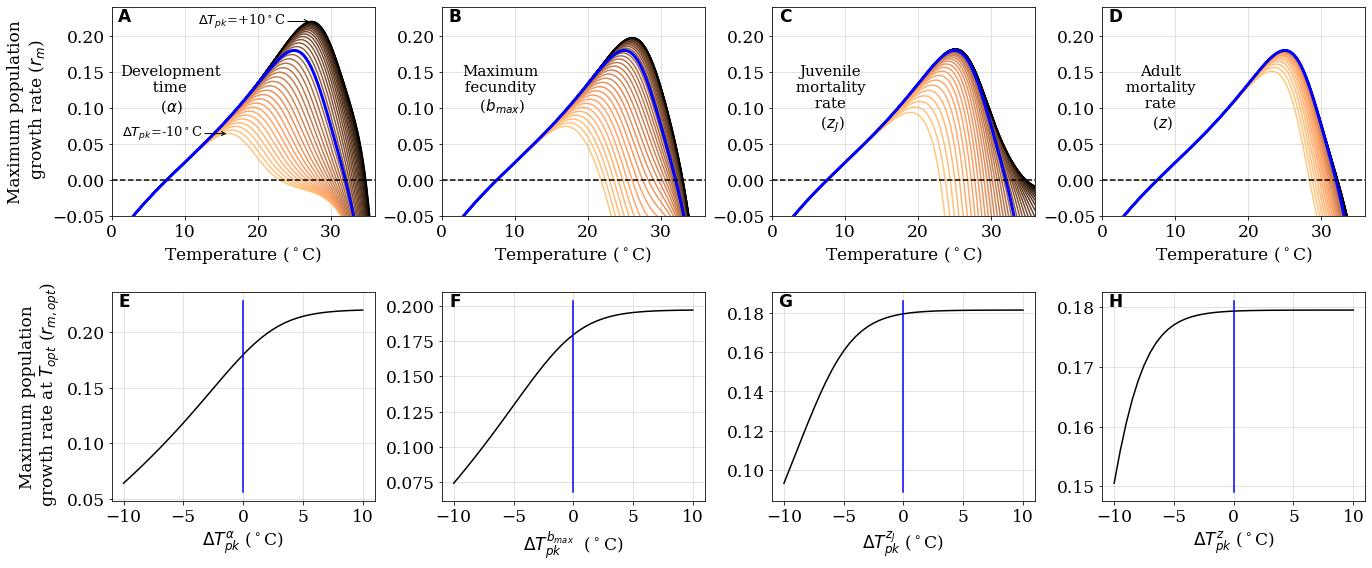

In [632]:
T_vec = 273.15+np.arange(0, 40, 0.05) #Vector of temperatures

alp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec = B_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec = B_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

r_m_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec, alp_vec)

T_pk_mm = T_pk_par + np.arange(-10,10.5,0.5) # new peaks
T_ref_mm = T_ref_par

r_opt_vec = ["NA"]*len(T_pk_mm)

fntsiz = 17
fig = plt.figure(figsize=(19, 8))
ax = fig.add_subplot(241)
ax.set_title('A', weight="bold", fontsize=fntsiz, x=.05, y=.9,**csfont) 
colormap = plt.cm.copper_r
cm = colormap(np.linspace(0, 1, len(T_pk_mm)))
ax.set_prop_cycle('color',cm)

for i in range(len(T_pk_mm)):
    alp_mm_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_mm[i]+273.15,T_ref_mm,E_D_alp,k_par,T_vec)
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec, alp_mm_tmp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
    ax.plot(T_vec-273.15, r_mm_tmp_vec, label = r'$\Delta T_{pk} = $ ' + str(i))
    if i == min(range(len(T_pk_mm))):
        tmp_x1 = (T_vec-273.15)[sc.where(r_mm_tmp_vec == max(r_mm_tmp_vec))[0][0]]
        tmp_y1 = max(r_mm_tmp_vec)
        ax.annotate(s='', xy=(tmp_x1,tmp_y1), 
                    xytext=(tmp_x1-3.5,tmp_y1), arrowprops=dict(arrowstyle='->'))
        ax.text(tmp_x1-3.5,tmp_y1, r'$\Delta T_{pk}$='+"{:.0f}".format(T_pk_mm[0] - T_pk_par)+r'$^\circ$C', 
                horizontalalignment='right', verticalalignment='center', fontsize=fntsiz-4)
    elif i == max(range(len(T_pk_mm))) :
        tmp_x1 = (T_vec-273.15)[sc.where(r_mm_tmp_vec == max(r_mm_tmp_vec))[0][0]]
        tmp_y1 = max(r_mm_tmp_vec)
        ax.annotate(s='', xy=(tmp_x1,tmp_y1), 
                    xytext=(tmp_x1-3.5,tmp_y1), arrowprops=dict(arrowstyle='->'))
        ax.text(tmp_x1-3.5,tmp_y1, r'$\Delta T_{pk}$=+'+"{:.0f}".format(T_pk_mm[len(T_pk_mm)-1] - T_pk_par)+r'$^\circ$C', 
                horizontalalignment='right', verticalalignment='center', fontsize=fntsiz-4)

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=fntsiz) 
ax.set_ylabel('Maximum population\n growth rate ($r_m$)', fontsize=fntsiz)
ax.set_ylim(-0.05,0.24)
ax.set_xlim(0,36)
ax.text(ax.get_xlim()[0]+8, ax.get_ylim()[1]-.08, 'Development\n time \n'+ r' ($\alpha$)', 
        horizontalalignment='center', verticalalignment='top', fontsize=fntsiz-2)
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)


ax = fig.add_subplot(245)
ax.set_title('E', weight="bold", fontsize=fntsiz, x=.05, y=.9,**csfont) 
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black')
ax.plot([0, 0], [ax.get_ylim()[0],ax.get_ylim()[1]], color='b', linestyle='-', linewidth=1.5)
ax.set_xlabel(r'$\Delta T_{pk}^\alpha$ ($^\circ$C)', fontsize=fntsiz) 
ax.set_ylabel('Maximum population\n growth rate at $T_{opt}$ ($r_{m,opt}$)', fontsize=fntsiz)
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

# ========= Next trait======================

r_opt_vec = ["NA"]*len(T_pk_mm)

ax = fig.add_subplot(242)
ax.set_title('B', weight="bold", fontsize=fntsiz, x=.05, y=.9,**csfont) 
ax.set_prop_cycle('color',cm)

for i in range(len(T_pk_mm)):

    bmax_mm_tmp_vec = B_lam(B_0_bmax,E_bmax,T_pk_mm[i]+273.15,T_ref_mm,E_D_bmax,k_par,T_vec)

    r_mm_tmp_vec = r_SP_app_lam(bmax_mm_tmp_vec, zJ_vec, z_vec, kap_vec, alp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
        
    ax.plot(T_vec-273.15, r_mm_tmp_vec, label = r'$\Delta T_{pk} = $ ' + str(i))

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=fntsiz) 
ax.set_ylim(-0.05,0.24)
ax.set_xlim(0,36)
ax.text(ax.get_xlim()[0]+8, ax.get_ylim()[1]-.08, 'Maximum\n fecundity \n'+ r' ($b_{max}$)', 
        horizontalalignment='center', verticalalignment='top', fontsize=fntsiz-2)
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

ax = fig.add_subplot(246)
ax.set_title('F', weight="bold", fontsize=fntsiz, x=.05, y=.9,**csfont) 
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black')
ax.plot([0, 0], [ax.get_ylim()[0],ax.get_ylim()[1]], color='b', linestyle='-', linewidth=1.5)
ax.set_xlabel(r'$\Delta T_{pk}^{b_{max}}$  ($^\circ$C)', fontsize=fntsiz) 
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

# ========= Next trait======================

r_opt_vec = ["NA"]*len(T_pk_mm)

ax = fig.add_subplot(2,4,3)
ax.set_title('C', weight="bold", fontsize=fntsiz, x=.05, y=.9,**csfont) 
ax.set_prop_cycle('color',cm)

for i in range(len(T_pk_mm)):

    zJ_mm_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_mm[i]+273.15,T_ref_mm,E_D_zJ,k_par,T_vec)

    r_mm_tmp_vec = r_SP_app_lam(bmax_vec, zJ_mm_tmp_vec, z_vec, kap_vec, alp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
    
    ax.plot(T_vec-273.15, r_mm_tmp_vec, label = r'$\Delta T_{pk} = $ ' + str(i))

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=fntsiz) 
ax.set_ylim(-0.05,0.24)
ax.set_xlim(0,36)
ax.text(ax.get_xlim()[0]+8, ax.get_ylim()[1]-.08, 'Juvenile\n mortality \n rate \n'+ r' ($z_J$)', 
        horizontalalignment='center', verticalalignment='top', fontsize=fntsiz-2)
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

ax = fig.add_subplot(2,4,7)
ax.set_title('G', weight="bold", fontsize=fntsiz, x=.05, y=.9,**csfont) 
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black')
ax.plot([0, 0], [ax.get_ylim()[0],ax.get_ylim()[1]], color='b', linestyle='-', linewidth=1.5)
ax.set_xlabel(r'$\Delta T_{pk}^{z_J}$ ($^\circ$C)', fontsize=fntsiz)
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

# ========= Next trait======================

r_opt_vec = ["NA"]*len(T_pk_mm)

ax = fig.add_subplot(2,4,4)
ax.set_title('D', weight="bold", fontsize=fntsiz, x=.05, y=.9,**csfont) 
ax.set_prop_cycle('color',cm)

for i in range(len(T_pk_mm)):
    z_mm_tmp_vec  = B_inv_lam(B_0_z,E_z,T_pk_mm[i]+273.15,T_ref_mm,E_D_z,k_par,T_vec)
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_mm_tmp_vec, kap_vec, alp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
    ax.plot(T_vec-273.15, r_mm_tmp_vec, label = r'$\Delta T_{pk} = $ ' + str(i))

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=fntsiz) 
ax.set_ylim(-0.05,0.24)
ax.set_xlim(0,36)
ax.text(ax.get_xlim()[0]+8, ax.get_ylim()[1]-.08, 'Adult\n mortality \n rate \n'+ r' ($z$)', 
        horizontalalignment='center', verticalalignment='top', fontsize=fntsiz-2)
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

ax = fig.add_subplot(2,4,8)
ax.set_title('H', weight="bold", fontsize=fntsiz, x=.05, y=.9,**csfont)
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black')
ax.plot([0, 0], [ax.get_ylim()[0],ax.get_ylim()[1]], color='b', linestyle='-', linewidth=1.5)
ax.set_xlabel(r'$\Delta T_{pk}^z$ ($^\circ$C)', fontsize=fntsiz) 
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

fig.tight_layout()

# plt.subplots_adjust(wspace=0.3, hspace=.4)

plt.savefig('../results/ThermMM.pdf')

The blue curve shows the TPC when $\Delta T_{pk}^{z_J,\alpha} = 0$; all curves above it indicate $\Delta T_{pk}^\alpha > 0$, and the ones below it $\Delta T_{pk}^\alpha < 0$. See main text for further explanation.

## The effect of physiological mismatches on population fitness

Given that a higher $T_{pk,\alpha}$ increases fitness, and that all trait-specific selection gradients are monotonically increasing, closer the $T_\text{pk}$'s of the other traits are to it, higher the $r_{m,opt}$. This can either be measured by the sum of all $T_\text{pk}$'s, or their variance. To illustrate this, we will use the same parameter values above, but fix $T_{pk,\alpha}$ at $40^\circ$C, while while randomly sampling the $T_\text{pk}$'s of all other traits from a uniform range of $0 - 40^\circ$C.

In [642]:
max_T_pk = 35
T_vec = np.arange(0, max_T_pk, 0.05)+273.15 #Vector of temperatures
kap_vec = B_lam(B_0_kap,0,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec) # keep kappa's TPC fixed as it has small effect (and no data exist for its TPCs)

np.random.seed(420)
samps = 10000 # number of simulations
T_pks = np.random.uniform(10,max_T_pk, [samps,4])+273.15 # generate uniform random T_pks in Kelvin for the 4 parameters other than alpha
r_opt_vec = np.zeros([samps, 2])

for i in range(samps): #THIS WILL GENNERATE SOME EXTREME VALUE WARNINGS WHEN MORTALITY RATES PEAK AT TOO HIGH A TEMPERATURE 
    alp_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pks[i,0],T_ref_par,E_D_alp,k_par,T_vec)
    bmax_tmp_vec = B_lam(B_0_bmax,E_bmax,T_pks[i,1],T_ref_par,E_D_bmax,k_par,T_vec)
    zJ_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pks[i,2],T_ref_par,E_D_zJ,k_par,T_vec)
    z_tmp_vec = B_inv_lam(B_0_z,E_z,T_pks[i,3],T_ref_par,E_D_z,k_par,T_vec)
    
    r_m_tmp_vec = r_SP_app_lam(bmax_tmp_vec, zJ_tmp_vec, z_tmp_vec, kap_vec, alp_tmp_vec)
    r_opt_vec[i,0] = max(r_m_tmp_vec)
    if ((T_pks[i,0] > T_pks[i,1] > T_pks[i,2] > T_pks[i,3]) | (T_pks[i,0] > T_pks[i,1] > T_pks[i,3] > T_pks[i,2])):
        r_opt_vec[i,1] = 1
    
T_pk_sums = np.sum(T_pks-273.15,1)
T_pk_vars = np.var(np.c_[T_pks-273.15, np.asarray([max_T_pk]*samps) ],1)

<lambdifygenerated-163>:2: RuntimeWarning: overflow encountered in power
  return (-(alpha*kappa*z_J + alpha*z*z_J + log(b_max**(-kappa - z)*(kappa + z)**(kappa + z)))/(alpha*kappa + alpha*z + 1))
<lambdifygenerated-163>:2: RuntimeWarning: overflow encountered in multiply
  return (-(alpha*kappa*z_J + alpha*z*z_J + log(b_max**(-kappa - z)*(kappa + z)**(kappa + z)))/(alpha*kappa + alpha*z + 1))


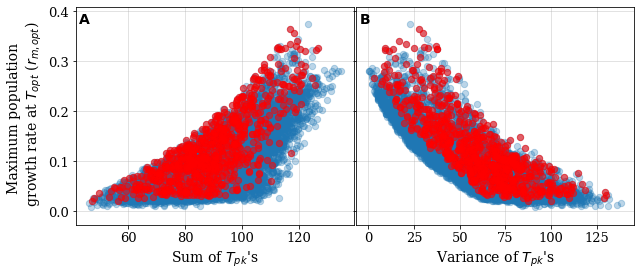

In [643]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.set_title('A', weight="bold", fontsize=14, x=.03, y=.9,**csfont) 
ax.scatter(T_pk_sums,r_opt_vec[:,0], s=40, alpha=.3)
ax.scatter(T_pk_sums[np.where(r_opt_vec[:,1] == 1)],r_opt_vec[np.where(r_opt_vec[:,1] == 1),0], 
           color = 'red', s=40, alpha=.55)
ax.set_xlabel(r"Sum of $T_{pk}$'s", fontsize=14)
ax.set_ylabel('Maximum population \n growth rate at $T_{opt}$ ($r_{m,opt}$)', fontsize=14);
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13)

ax = fig.add_subplot(122)
ax.set_title('B', weight="bold", fontsize=14, x=.03, y=.9,**csfont); 
ax.scatter(T_pk_vars,r_opt_vec[:,0], s=40, alpha=.3)
ax.scatter(T_pk_vars[np.where(r_opt_vec[:,1] == 1)],r_opt_vec[np.where(r_opt_vec[:,1] == 1),0], 
           color = 'red', s=40, alpha=.55)
ax.set_xlabel(r"Variance of $T_{pk}$'s", fontsize=14);
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13)
ax.axes.yaxis.set_ticklabels([])

plt.subplots_adjust(wspace=0.01, hspace=.00)

plt.savefig('../results/TherMM_grad.pdf')

## Sensitivity of the results to the parametrisation of fecundity loss rate ($\kappa$)

Fecundity typically declines over time, which can have significant impacts on the lifetime reproduction of individuals and therefore fitness. The rate at which fecundity declines with age ($\kappa$) may be temperature-dependent, but there appears to be practically no exisiting data on this for arthropods. Therefore, here we quantify the sensitivity of our theoretical predictions to changes in parametrisation of baseline fecundity loss rate (the normalisation constant $\kappa_0$). Specifically, we re-evaluate our trait sensitivity analyses, as well as our calculation of selection gradient by varying $\kappa_0$ across two extreme values, around the value we have used to generate the main results (0.1).

Here's what changing $\kappa_0$ does (qualitatively) to the shape of the fecundity curve at any given temperature:  

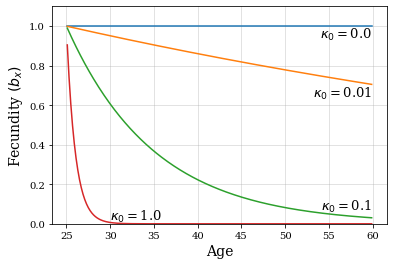

In [635]:
fig = plt.figure(); ax = fig.add_subplot(111)
b_x_lam = lambdify((b_max, kappa, alpha, x), b_x, np) #use lambidify to speed up

kap_range = [0.0,0.01,0.1,1.0]

ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_max_par, kap_range[0], alp_par, x_vec[x_vec>alp_par]));
ax.text(max(x_vec), 1, r'$\kappa_0 = $'+ str(kap_range[0]), horizontalalignment = "right", 
        verticalalignment = "top", fontsize = 13);
ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_max_par, kap_range[1], alp_par, x_vec[x_vec>alp_par]));
ax.text(max(x_vec), .7, r'$\kappa_0 = $'+ str(kap_range[1]), horizontalalignment = "right", 
        verticalalignment = "top", fontsize = 13);
ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_max_par, kap_range[2], alp_par, x_vec[x_vec>alp_par]));
ax.text(max(x_vec), 0.05, r'$\kappa_0 = $'+ str(kap_range[2]), horizontalalignment = "right", 
        verticalalignment = "bottom", fontsize = 13);
ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_max_par, kap_range[3], alp_par, x_vec[x_vec>alp_par]));
ax.text(30, 0, r'$\kappa_0 = $'+ str(kap_range[3]), horizontalalignment = "left", 
        verticalalignment = "bottom", fontsize = 13);
ax.set_xlabel('Age', fontsize=14);
ax.set_ylim([0,b_max_par*1.1]);
ax.set_ylabel('Fecundity $(b_x)$', fontsize=14)
plt.savefig('../results/kappa_plot.pdf')

Also, note that the TPC shape for $\kappa$ remains the same (for the two meangful extreme values of $\kappa_0$): 

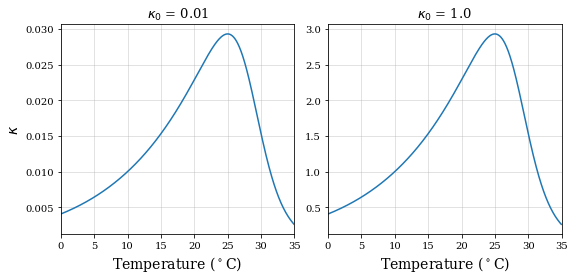

In [636]:
# kap_lo = min(kap_range)
kap_lo = kap_range[1]
kap_hi = max(kap_range)

kap_vec_lo = B_lam(kap_lo,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)
kap_vec_hi = B_lam(kap_hi,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(121)

ax.plot(T_vec-273.15, kap_vec_lo);
ax.set_xlim([0,35])
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel(r'$\kappa$', fontsize=14)
ax.set_title(r'$\kappa_0$ = ' + str(kap_lo), fontsize=13) 

ax = fig.add_subplot(122)

ax.plot(T_vec-273.15, kap_vec_hi);
ax.set_xlim([0,35])
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_title(r'$\kappa_0$ = ' + str(kap_hi), fontsize=13) ;
fig.tight_layout()

### Effect on the trait sensitivity results

First we re-evaluate the trait sensitivity analysis results. 

In [637]:
T_vec = 273.15+np.arange(0, 40, 0.05) #Vector of temperatures

alp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec = B_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec_lo = B_lam(kap_lo,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)
kap_vec_hi = B_lam(kap_hi,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

dr_dkap_vec_lo = dr_dkap_lam(bmax_vec, alp_vec, z_vec, zJ_vec, kap_vec_lo)
dr_dkap_vec_hi = dr_dkap_lam(bmax_vec, alp_vec, z_vec, zJ_vec, kap_vec_hi)

dkap_dT_vec_lo =  dkap_dT_lam(kap_lo,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)
dkap_dT_vec_hi =  dkap_dT_lam(kap_hi,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

dr_dkap_dT_vec_lo = dr_dkap_vec_lo * dkap_dT_vec_lo
dr_dkap_dT_vec_hi = dr_dkap_vec_hi * dkap_dT_vec_lo

dr_dT_vec_lo = dr_dbmax_dT_vec + dr_dalp_dT_vec + dr_dz_dT_vec + dr_dzJ_dT_vec + dr_dkap_dT_vec_lo
dr_dT_A_vec_lo = dr_dbmax_dT_vec + dr_dz_dT_vec + dr_dkap_dT_vec_lo

dr_dT_vec_hi = dr_dbmax_dT_vec + dr_dalp_dT_vec + dr_dz_dT_vec + dr_dzJ_dT_vec + dr_dkap_dT_vec_hi
dr_dT_A_vec_hi = dr_dbmax_dT_vec + dr_dz_dT_vec + dr_dkap_dT_vec_hi

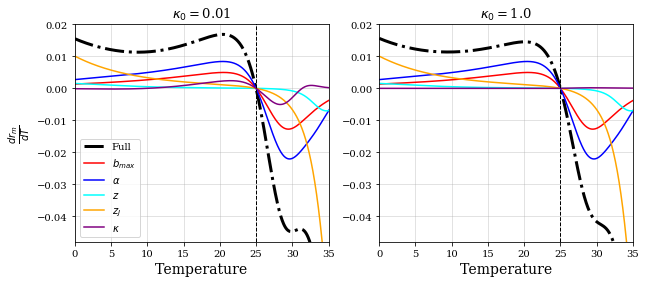

In [638]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.plot(T_vec-273.15,dr_dT_vec_lo, 'black', linewidth=3, linestyle='-.')
ax.set_title(r'$\kappa_0 = $'+str(kap_lo), fontsize=13) 
ax.plot(T_vec-273.15,dr_dbmax_dT_vec, 'red')
ax.plot(T_vec-273.15,dr_dalp_dT_vec, 'blue')
ax.plot(T_vec-273.15,dr_dz_dT_vec, 'cyan')
ax.plot(T_vec-273.15,dr_dzJ_dT_vec, 'orange')
ax.plot(T_vec-273.15,dr_dkap_dT_vec_lo, 'purple')
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim(0,35)
ax.set_ylim(-0.048,.02)
ax.set_xlabel('Temperature', fontsize=14); 
ax.set_ylabel(r'$\frac{dr_m}{dT}$', fontsize=14);
plt.legend(['Full', '$b_{max}$', r'$\alpha$', '$z$', '$z_J$', r'$\kappa$'], loc='lower left') #Add kappa to legend if included in analysis

ax = fig.add_subplot(122)
ax.plot(T_vec-273.15,dr_dT_vec_hi, 'black', linewidth=3, linestyle='-.')
ax.set_title(r'$\kappa_0 = $'+str(kap_hi), fontsize=13) 
ax.plot(T_vec-273.15,dr_dbmax_dT_vec, 'red')
ax.plot(T_vec-273.15,dr_dalp_dT_vec, 'blue')
ax.plot(T_vec-273.15,dr_dz_dT_vec, 'cyan')
ax.plot(T_vec-273.15,dr_dzJ_dT_vec, 'orange')
ax.plot(T_vec-273.15,dr_dkap_dT_vec_hi, 'purple')
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,35])
ax.set_ylim([-0.048,0.02])
ax.set_xlabel('Temperature', fontsize=14)

plt.savefig('../results/r_sens_kap.pdf')

As expected, in the case where baseline kappa ($\kappa_0$) is lower, maximum fecundity ($b_\text{max}$) becomes more important relative to $\kappa$, leaving the order of importance of the 5 traits the same as for the intermediate case ($\kappa_0 = 0.1$) upon which our main results are based.

### The selection gradients revisited 

Next we re-evaluate the $r_m$ TPC and selection gradient as above. We focus only on the dominant trait $\alpha$ because the order of the strengths of selection gradients is bound to remain  unchanged due to the unchanged order of trait sensitivity irrespective of the $\kappa_0$ value (previous section).  

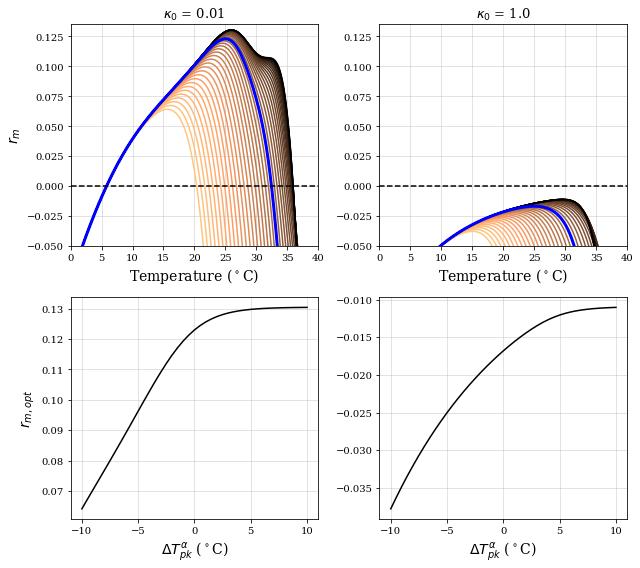

In [639]:
fig = plt.figure(figsize=(9, 8))

ax = fig.add_subplot(221)
ax.set_title(r'$\kappa_0$ = ' + str(kap_lo), fontsize=13) 
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('$r_m$', fontsize=14)

r_m_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec_lo, alp_vec)

r_opt_vec = ["NA"]*len(T_pk_mm)

colormap = plt.cm.copper_r 
ax.set_prop_cycle('color',[colormap(i) for i in np.linspace(0, 1, len(T_pk_mm))])

for i in range(len(T_pk_mm)):
    alp_mm_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_mm[i]+273.15,T_ref_mm,E_D_alp,k_par,T_vec)
    zJ_mm_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_mm[i]+273.15,T_ref_mm,E_D_zJ,k_par,T_vec)
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec,zJ_mm_tmp_vec, z_vec, kap_vec_lo, alp_mm_tmp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
        
    ax.plot(T_vec-273.15, r_mm_tmp_vec)

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
plt.ylim(-0.05,0.135)
plt.xlim(0,40)

ax = fig.add_subplot(223)
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black');
ax.set_xlabel(r'$\Delta T_{pk}^\alpha$ ($^\circ$C)', fontsize=14); 
ax.set_ylabel('$r_{m, opt}$', fontsize=14)

ax = fig.add_subplot(222)
ax.set_title(r'$\kappa_0$ = ' + str(kap_hi), fontsize=13) 
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 

r_m_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec_hi, alp_vec)

r_opt_vec = ["NA"]*len(T_pk_mm)

ax.set_prop_cycle('color',[colormap(i) for i in np.linspace(0, 1, len(T_pk_mm))])

for i in range(len(T_pk_mm)):

    alp_mm_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_mm[i]+273.15,T_ref_mm,E_D_alp,k_par,T_vec)
    zJ_mm_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_mm[i]+273.15,T_ref_mm,E_D_zJ,k_par,T_vec)
    
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec,zJ_mm_tmp_vec, z_vec, kap_vec_hi, alp_mm_tmp_vec)
        
    r_opt_vec[i] = max(r_mm_tmp_vec)
    
    ax.plot(T_vec-273.15, r_mm_tmp_vec)

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--");
plt.ylim(-0.05,0.135)
plt.xlim(0,40)

ax = fig.add_subplot(224)
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black');
ax.set_xlabel(r'$\Delta T_{pk}^\alpha$ ($^\circ$C)', fontsize=14); 

fig.tight_layout()

Thus the selection gradient remains qualitatively unchanged, with overall $r_m$ lower when $\kappa$ is high, as expected.  